# Wine Quality Prediction - Task-4

# Import Required Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split    # For splitting data
from sklearn.preprocessing import StandardScaler        # For feature scaling
from sklearn.ensemble import RandomForestClassifier     # Model 1
from sklearn.linear_model import SGDClassifier          # Model 2
from sklearn.svm import SVC                             # Model 3
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and Explore the Data

In [57]:
data = pd.read_csv("WineQT (1).csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [58]:
# Display first 5 rows
print("First 5 rows of dataset:")
display(data.head())

First 5 rows of dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [59]:
# Show shape of dataset(rows & columns)
print("Dataset shape (rows,columns) :",data.shape)

Dataset shape (rows,columns) : (1143, 13)


In [60]:
# Display basic info about dataset
print("\n Dataset information :\n")
print(data.info())


 Dataset information :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [61]:
# Check for missing values
print("Missing Values in Each Column:\n")
print(data.isnull().sum())

Missing Values in Each Column:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


# Data Cleaning & Preprocessing

In [62]:
# Drop unnecessary column
data = data.drop(columns=['Id'])

In [63]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [64]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# here Number of duplicate rows are 125

Number of duplicate rows: 125


In [65]:
# Remove duplicates if any
data = data.drop_duplicates()

In [66]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [67]:
# Confirm shape after removing duplicates
print(f"Data shape after cleaning: {data.shape}")

Data shape after cleaning: (1018, 12)


# Exploratory Data Analysis (EDA)

In [68]:
import warnings
warnings.filterwarnings("ignore")

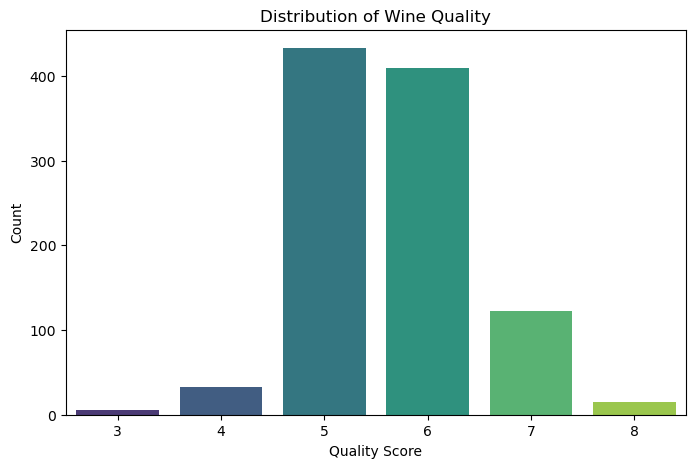

In [69]:
# Check distribution of wine quality
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data = data, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

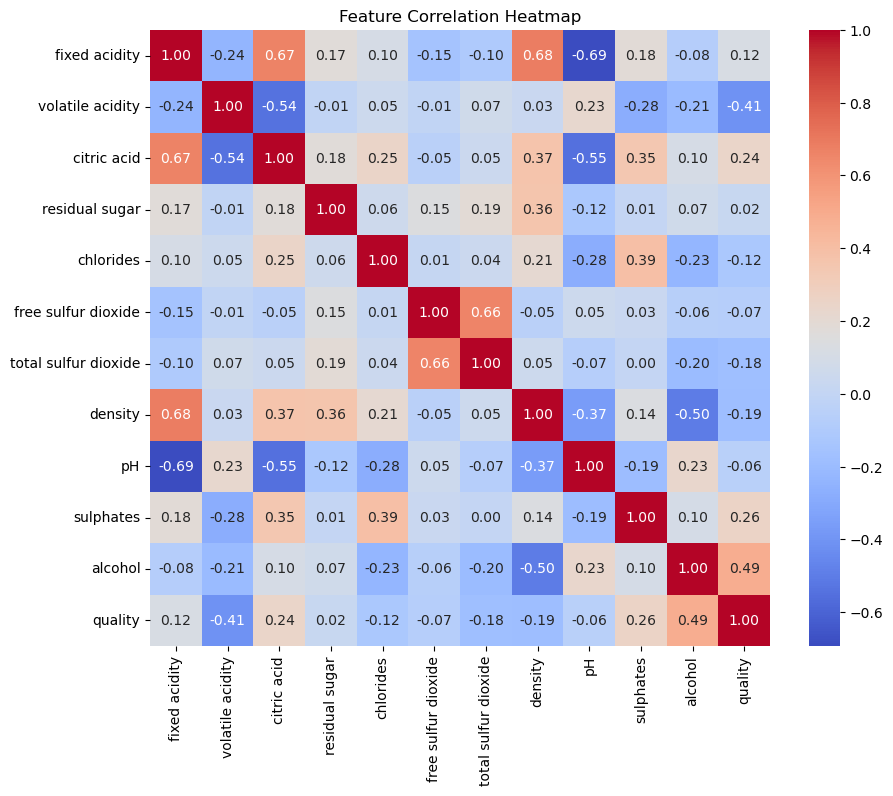

In [70]:
# Correlation heatmap (to see relationships between features)
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Quality Categorization

In [71]:
# Convert 'quality' into 3 categories → Bad, Average, Good

def categorize_quality(value):
    if value <= 4:
        return 'Bad'
    elif value <= 6:
        return 'Average'
    else:
        return 'Good'

data['quality_label'] = data['quality'].apply(categorize_quality)

print("\nQuality categories distribution:\n", data['quality_label'].value_counts())


Quality categories distribution:
 quality_label
Average    842
Good       137
Bad         39
Name: count, dtype: int64


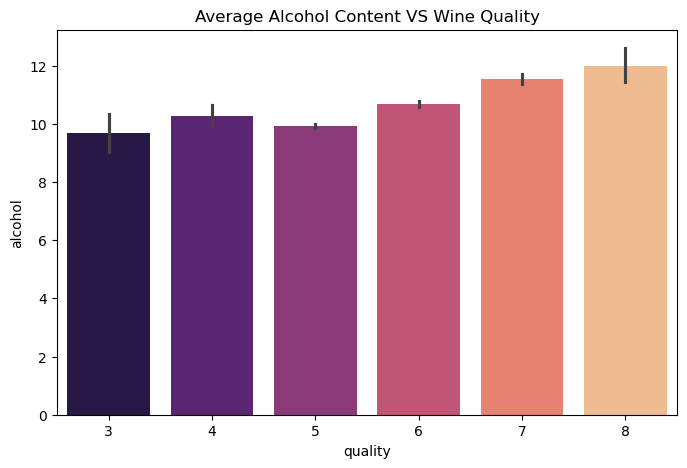

In [72]:
# Relationship between alcohol and quality
plt.figure(figsize=(8,5))
sns.barplot(x='quality',y='alcohol', data=data, palette='magma')
plt.title('Average Alcohol Content VS Wine Quality')
plt.show()

# Feature Preparation

In [73]:
# Before we can train any model, we must separate our features (inputs) and target variable (output).

# Prepare features (X) and target (y)
X = data.drop(['quality', 'quality_label'], axis=1) # drop 'quality' & 'quality_labels' column for features
y = data['quality_label']

print("\nFeature shape:", X.shape)
print("Target shape:", y.shape)



Feature shape: (1018, 11)
Target shape: (1018,)


In [74]:
# Check the shapes

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (1018, 11)
Target shape: (1018,)


# Splitting Data for Training and Testing

We split our dataset so that we can test how well the model performs on unseen data.

In [75]:
# Split data into training and testing sets (80%-20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining and Testing split done.")
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Training and Testing split done.
Train size: (814, 11)
Test size: (204, 11)


# Feature Scaling (Standardization)

Since models like SVM and SGD are sensitive to the scale of features, we standardize our data.

In [76]:
# Scale the data (important for models like SVC & SGD)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\n Data scaling done successfully.")


 Data scaling done successfully.


# Model Training (Random Forest, SGD, SVC)

Now we’ll train three classification models.

In [83]:
# Define and train the 3 models

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
    "Support Vector Classifier": SVC(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n🔹 Model: {name}")
    print(f"Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))

# Explanation:
# Each model is trained separately on the training data, 
# predictions are made, and evaluation metrics are printed.
# Accuracy & classification report show how well each model performs.


🔹 Model: Random Forest
Accuracy: 0.80
              precision    recall  f1-score   support

     Average       0.82      0.95      0.88       158
         Bad       0.00      0.00      0.00        14
        Good       0.65      0.41      0.50        32

    accuracy                           0.80       204
   macro avg       0.49      0.45      0.46       204
weighted avg       0.74      0.80      0.76       204


🔹 Model: SGD Classifier
Accuracy: 0.77
              precision    recall  f1-score   support

     Average       0.78      0.98      0.87       158
         Bad       0.00      0.00      0.00        14
        Good       0.40      0.06      0.11        32

    accuracy                           0.77       204
   macro avg       0.39      0.35      0.33       204
weighted avg       0.67      0.77      0.69       204


🔹 Model: Support Vector Classifier
Accuracy: 0.79
              precision    recall  f1-score   support

     Average       0.80      0.96      0.88       158

# Accuracy Comparison Graph

We can also show the accuracy comparison graphically

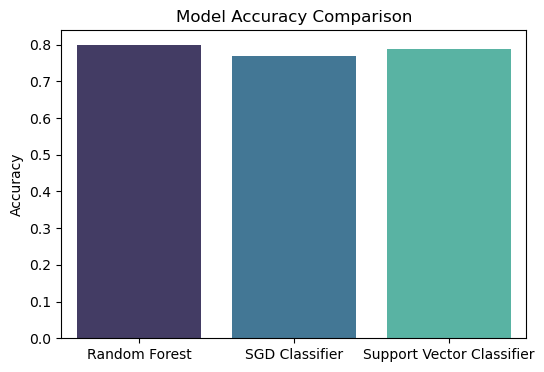

In [78]:
# Compare model accuracies visually

plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='mako')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# This bar chart shows which model performed the best overall.

# Confusion Matrix for Best Model

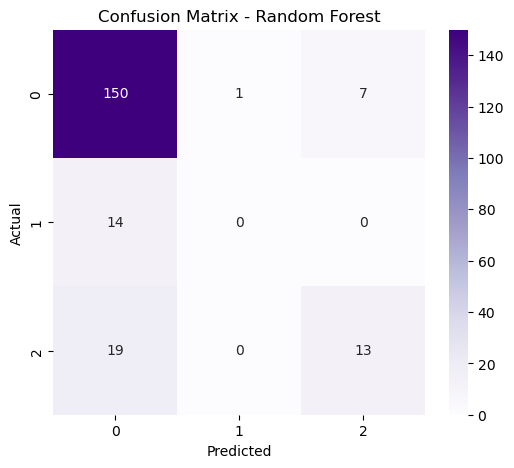

In [84]:
# Confusion Matrix for the best model (Random Forest)

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Purples')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (for Random Forest)

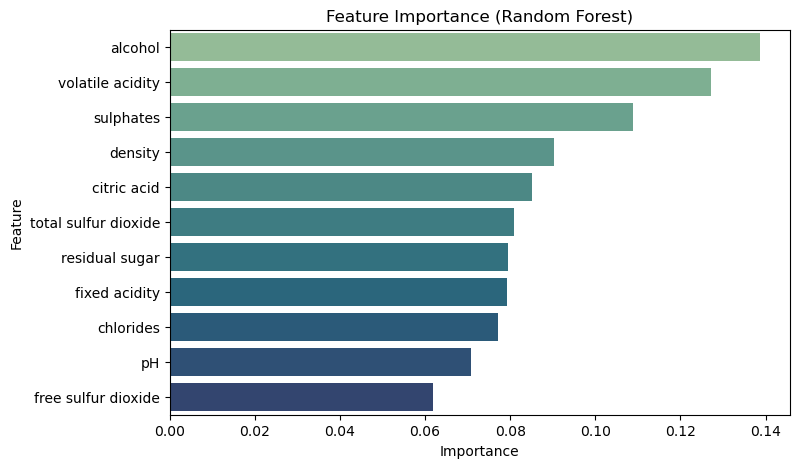

In [80]:
# Feature Importance (only for Random Forest)

if best_model_name == "Random Forest":
    importance = best_model.feature_importances_
    features = X.columns
    imp_df = pd.DataFrame({'Feature': features, 'Importance': importance})
    imp_df = imp_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x='Importance', y='Feature', data=imp_df, palette='crest')
    plt.title('Feature Importance (Random Forest)')
    plt.show()


# Final Summary

In [86]:
# Final Model Summary

print("\n=== FINAL MODEL PERFORMANCE SUMMARY ===")
for model, acc in results.items():
    print(f"{model}: {acc*100:.2f}%")

best = max(results, key=results.get)
print(f"\n Best Performing Model: {best}")


=== FINAL MODEL PERFORMANCE SUMMARY ===
Random Forest: 79.90%
SGD Classifier: 76.96%
Support Vector Classifier: 78.92%

 Best Performing Model: Random Forest


# Conclusion

"This project predicts the quality of wine (Bad / Average / Good) based on its chemical characteristics such as acidity, sulphates, and alcohol content.

Three models — Random Forest, SGD, and SVC — were trained and compared.

The Random Forest Classifier achieved the highest accuracy, showing that alcohol, sulphates, and volatile acidity are the most important features influencing wine quality."